In [1]:
import cv2
import os

data_path='/content/drive/MyDrive/face-mask-detection-keras-master/dataset'
categories=os.listdir(data_path) #mask and no mask
labels=[i for i in range(len(categories))] #it's just going to be 2 (0,1) since there are only two categories: with mast and without mast

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [2]:
img_size = 100
data = []
target = []

for category in categories:
    folder_path = os.path.join(data_path,category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)

        try:
            grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(grey,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print('error',e)

error OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

error OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [3]:
import numpy as np
from keras.utils import np_utils

data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

new_target = np_utils.to_categorical(target)

In [4]:
# np.save('data',data)
# np.save('taget',target)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


In [11]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3),))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [12]:
checkpoint = ModelCheckpoint('moodel.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.6582 - accuracy: 0.6032

31/31 [==============================] - 13s 101ms/step - loss: 0.6582 - accuracy: 0.6032 - val_loss: 0.6505 - val_accuracy: 0.6371
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.4468 - accuracy: 0.7895

31/31 [==============================] - 2s 72ms/step - loss: 0.4468 - accuracy: 0.7895 - val_loss: 0.4100 - val_accuracy: 0.8105
Epoch 3/20
31/31 [==============================] - 1s 43ms/step - loss: 0.2825 - accuracy: 0.8877 - val_loss: 0.4328 - val_accuracy: 0.8306
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.1845 - accuracy: 0.9291

31/31 [==============================] - 2s 79ms/step - loss: 0.1845 - accuracy: 0.9291 - val_loss: 0.2660 - val_accuracy: 0.8871
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.1237 - accuracy: 0.9595

31/31 [==============================] - 2s 71ms/step - loss: 0.1237 - accuracy: 0.9595 - val_loss: 0.1819 - val_accuracy: 0.9194
Epoch 6/20
31/31 [==============================] - 1s 41ms/step - loss: 0.0992 - accuracy: 0.9636 - val_loss: 0.1913 - val_accuracy: 0.9315
Epoch 7/20
31/31 [==============================] - 1s 40ms/step - loss: 0.0961 - accuracy: 0.9656 - val_loss: 0.2292 - val_accuracy: 0.9153
Epoch 8/20
31/31 [==============================] - 1s 40ms/step - loss: 0.0723 - accuracy: 0.9818 - val_loss: 0.2075 - val_accuracy: 0.9315
Epoch 9/20
31/31 [==============================] - 1s 42ms/step - loss: 0.0519 - accuracy: 0.9767 - val_loss: 0.2949 - val_accuracy: 0.9234
Epoch 10/20
31/31 [==============================] - 1s 41ms/step - loss: 0.0369 - accuracy: 0.9899 - val_loss: 0.2486 - val_accuracy: 0.9395
Epoch 11/20
31/31 [==============================] - 1s 40ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.2269 - val_accuracy: 0.9274
Epoch 12/20
31/31 [===

In [13]:
import pandas as pd

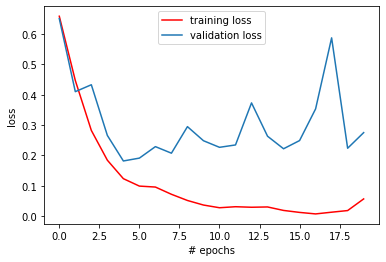

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

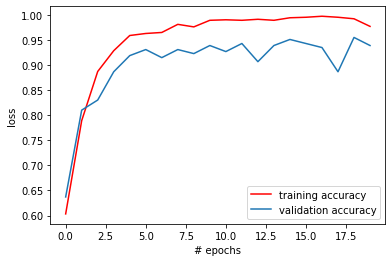

In [16]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 60ms/step - loss: 0.3003 - accuracy: 0.9203
[0.3003433644771576, 0.9202898740768433]
